In [3]:
#IMPORTANDO LIBRERÍAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#IMPORTANDO FUNCIONES DESDE SKLEARN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.decomposition import FactorAnalysis 
#IMPORTANDO ARBOLES DE DECISIÓN POR SKLEARN
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#IMPORTANDO LIBRERÍAS PARA DIBUJAR ARBOLES Y GRÁFICOS
from graphviz import Digraph
import seaborn as sb

# IMPORTANDO DATA SET (Movies.csv y Rating.csv)
movies_data = pd.read_csv("movies.csv")
ratings_data = pd.read_csv("ratings.csv")

In [4]:
# --- PRIMERO TRABAJANDO UN POCO LA DATA -----

#VISUALIZANDO LOS DATOS DE MOVIES, SE OBSERVA QUE CADA PELÍCULA PUEDE TENER MÚLTIPLES GÉNEROS
#ADEMÁS DE LO ANTERIOR, LAS PELÍCULAS INCLUYEN EL AÑO EN CONJUNTO AL TÍTULO, ADEMÁS DE NOMBRES ALTERNATIVOS PARA ALGUNAS.
movies_data.tail()

,movieId,title,genres
9736,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9737,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9738,193585,Flint (2017),Drama
9739,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9740,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [5]:
movies_data.describe()

,movieId
count,9741.000000
mean,42187.954317
std,52148.812467
min,1.000000
25%,3248.000000
50%,7299.000000
75%,76175.000000
max,193609.000000


In [6]:
movies_data.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [7]:
#VISUALIZANDO LOS DATOS DE RATINGS, SE OBSERVA LA RELACIÓN CON EL DATASET ANTERIOR MEDIANTE LA COLUMNA userId.
#RÁPIDAMENTE SE PUEDE PENSAR EN ELIMINAR LA COLUMNA TIMESTAMPS QUE NO SERÁ INFLUYENTE DENTRO DE LO QUE SE QUIERE PREDECIR
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings_data.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [9]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,100835.000000,100835.000000,100835.000000,1.008350e+05
mean,326.128973,19433.872138,3.501562,1.205943e+09
std,182.618849,35528.287562,1.042533,2.162596e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8121.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
ratings_data.drop('userId', axis=1, inplace=True)
ratings_data['meanRating'] = ratings_data.groupby('movieId')['rating'].transform('mean')
ratings_data['countVotes'] = ratings_data.groupby('movieId')['movieId'].transform('count')
ratings_data.drop('rating', axis=1, inplace=True)
ratings_data.drop('timestamp', axis=1, inplace=True)
ratings_data = ratings_data.drop_duplicates()
ratings_data = ratings_data.sort_values(by=['movieId'])
ratings_data.head()

,movieId,meanRating,countVotes
0,1,3.920930,215
560,2,3.431818,110
1,3,3.259615,52
562,4,2.357143,7
563,5,3.071429,49


In [11]:
data_set = movies_data.merge(ratings_data, on='movieId')
# new data frame with split value columns 
new = data_set["genres"].str.split("|", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data_set["genre"]= new[0]
data_set.drop('genres', axis=1, inplace=True)
data_set['successful'] = np.where(data_set['meanRating']>=3.7, 1, 0)
data_set.head()

,movieId,title,meanRating,countVotes,genre,successful
0,1,Toy Story (1995),3.920930,215,Adventure,1
1,2,Jumanji (1995),3.431818,110,Adventure,0
2,3,Grumpier Old Men (1995),3.259615,52,Comedy,0
3,4,Waiting to Exhale (1995),2.357143,7,Comedy,0
4,5,Father of the Bride Part II (1995),3.071429,49,Comedy,0


In [12]:
data_set.genre.unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi', 'Musical',
       'War', '(no genres listed)'], dtype=object)

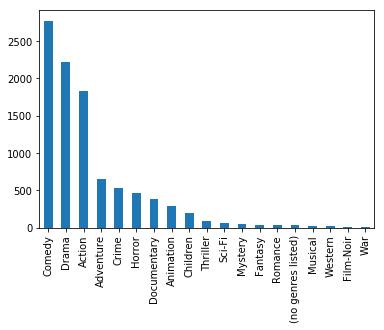

In [13]:
data_set['genre'].value_counts().plot(kind='bar')

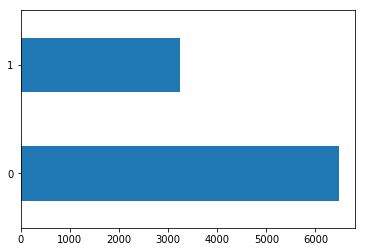

In [14]:
data_set['successful'].value_counts().plot(kind='barh')

In [15]:
data_set['year'] = data_set['title'].str.extract(r'\((\d{4})\)')
data_set.head()

,movieId,title,meanRating,countVotes,genre,successful,year
0,1,Toy Story (1995),3.920930,215,Adventure,1,1995
1,2,Jumanji (1995),3.431818,110,Adventure,0,1995
2,3,Grumpier Old Men (1995),3.259615,52,Comedy,0,1995
3,4,Waiting to Exhale (1995),2.357143,7,Comedy,0,1995
4,5,Father of the Bride Part II (1995),3.071429,49,Comedy,0,1995


/home/simonsp/tarea2-py2.7/local/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


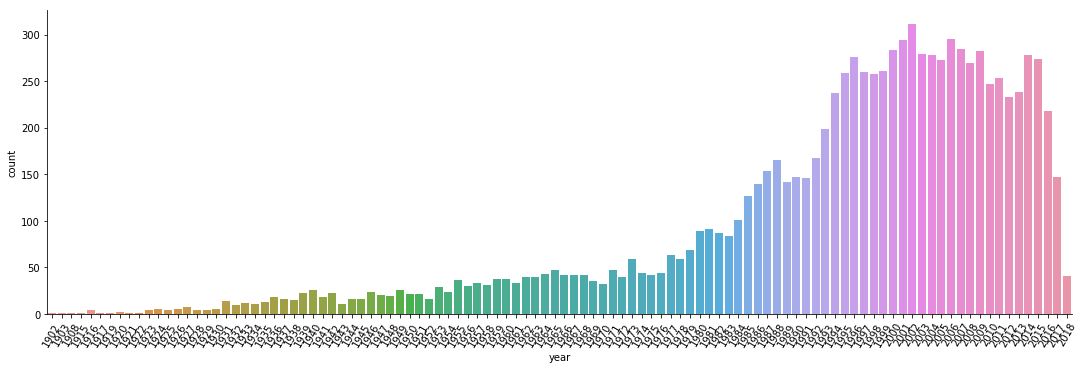

In [16]:
g = sb.factorplot('year',data=data_set,kind="count", aspect=3)
g.set_xticklabels(rotation=60)

In [17]:
data_set['year'].fillna("2018", inplace=True)

In [18]:
data_set.min()

movieId                        1
title                 '71 (2014)
meanRating                   0.5
countVotes                     1
genre         (no genres listed)
successful                     0
year                        1902
dtype: object

In [19]:
data_set.max()

movieId                                          193609
title         À nous la liberté (Freedom for Us) (1931)
meanRating                                            5
countVotes                                          329
genre                                           Western
successful                                            1
year                                               2018
dtype: object

In [20]:
data_set.dtypes

movieId         int64
title          object
meanRating    float64
countVotes      int64
genre          object
successful      int64
year           object
dtype: object

In [21]:
data_set['year'] = pd.to_numeric(data_set["year"])

In [22]:
data_set.dtypes

movieId         int64
title          object
meanRating    float64
countVotes      int64
genre          object
successful      int64
year            int64
dtype: object

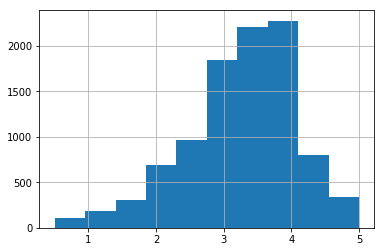

In [23]:
data_set['meanRating'].hist()

In [24]:
data_set.corr()

,movieId,meanRating,countVotes,successful,year
movieId,1.000000,0.027920,-0.202293,0.070718,0.497579
meanRating,0.027920,1.000000,0.127247,0.710128,-0.109715
countVotes,-0.202293,0.127247,1.000000,0.088853,-0.006014
successful,0.070718,0.710128,0.088853,1.000000,-0.098290
year,0.497579,-0.109715,-0.006014,-0.098290,1.000000


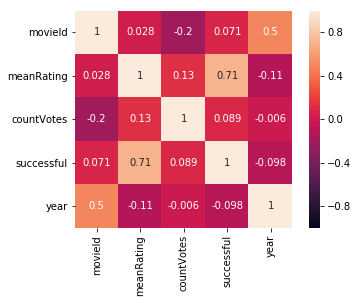

In [25]:
sb.heatmap(data_set.corr(), square=True, annot=True, vmin=-1, vmax=1)

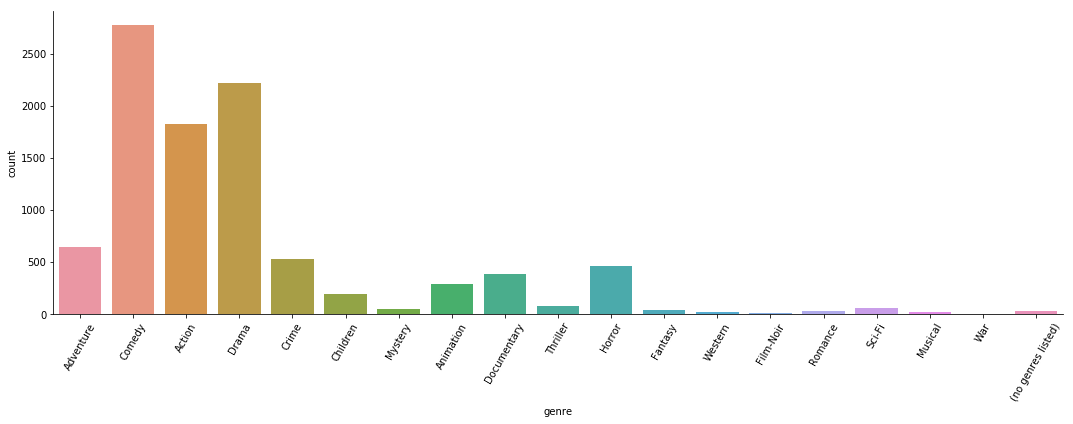

In [26]:
g = sb.factorplot('genre',data=data_set,kind="count", aspect=3)
g.set_xticklabels(rotation=60)

In [27]:
# PASANDO DATOS CATEGORICOS A UNA REPRESENTACIÓN NUMERICA
data_set['year'].astype(int)
data_set.loc[ data_set['year'] <= 1930, 'yearEncoded']                         = 0
data_set.loc[(data_set['year'] > 1930) & (data_set['year'] <= 1960), 'yearEncoded'] = 1
data_set.loc[(data_set['year'] > 1960) & (data_set['year'] <= 1990), 'yearEncoded'] = 2
data_set.loc[ data_set['year'] > 1990, 'yearEncoded'] = 3

data_set.loc[ data_set["countVotes"] <= 20, 'countEncoded']                         = 0
data_set.loc[(data_set["countVotes"] > 20) & (data_set["countVotes"] <= 50), 'countEncoded'] = 1
data_set.loc[(data_set["countVotes"] > 50) & (data_set["countVotes"] <= 100), 'countEncoded'] = 2
data_set.loc[ data_set["countVotes"] > 100, 'countEncoded'] = 3

le_genres = LabelEncoder()
data_set["genreEncoded"] = le_genres.fit_transform(data_set["genre"])

In [28]:
data_set.head()

,movieId,title,meanRating,countVotes,genre,successful,year,yearEncoded,countEncoded,genreEncoded
0,1,Toy Story (1995),3.920930,215,Adventure,1,1995,3.0,3.0,2
1,2,Jumanji (1995),3.431818,110,Adventure,0,1995,3.0,3.0,2
2,3,Grumpier Old Men (1995),3.259615,52,Comedy,0,1995,3.0,2.0,5
3,4,Waiting to Exhale (1995),2.357143,7,Comedy,0,1995,3.0,0.0,5
4,5,Father of the Bride Part II (1995),3.071429,49,Comedy,0,1995,3.0,1.0,5


In [29]:
data_set.genreEncoded.unique()

array([ 2,  5,  1,  8,  6,  4, 13,  3,  7, 16, 11,  9, 18, 10, 14, 15, 12,
       17,  0])

In [72]:
data_set.genre.unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi', 'Musical',
       'War', '(no genres listed)'], dtype=object)

In [30]:
drop_elements = ['movieId','title','meanRating','countVotes','genre','year','successful']
inputs_en = data_set.drop(drop_elements, axis = 1)
target = data_set['successful']

In [31]:
inputs_en.head()

,yearEncoded,countEncoded,genreEncoded
0,3.0,3.0,2
1,3.0,3.0,2
2,3.0,2.0,5
3,3.0,0.0,5
4,3.0,1.0,5


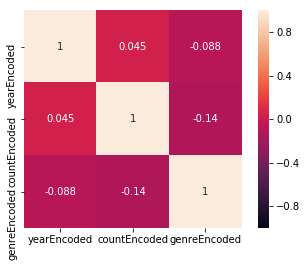

In [32]:
sb.heatmap(inputs_en.corr(), square=True, annot=True, vmin=-1, vmax=1)

In [33]:
target.head()

0    1
1    0
2    0
3    0
4    0
Name: successful, dtype: int64

In [149]:
# --- CREANDO EL MODELO DE ARBOL DE DECISION CON ENTROPY ---
modelOne = tree.DecisionTreeClassifier(criterion="entropy",max_depth=7)
X_train, X_test, y_train, y_test = train_test_split(inputs_en, target, test_size=0.2, random_state=1) # 80% training and 30% test
modelOne.fit(X_train,y_train)
#PREDICCIÓN
y_pred = modelOne.predict(X_test)

In [150]:
#ACCURACY DESICION TREE CLASSIFIER
print("Precision del modelo:",metrics.accuracy_score(y_test, y_pred))

('Precision del modelo:', 0.6946015424164524)


In [151]:
#GENERANDO EL ARCHIVO QUE GRAFICARÁ EL ÁRBOL
with open("mi_arbol.dot", 'w') as archivo_dot:
    tree.export_graphviz(modelOne, out_file = archivo_dot, class_names=['no_exitosa','exitosa'],feature_names=['Year', 'Votes','Genre'], impurity=False, filled=True)

# UTILIZANDO DOT PARA GRAFICAR EL ÁRBOL.
!dot -Tjpeg mi_arbol.dot -o arbol_decision1.jpeg

In [152]:
print modelOne.predict([[12,0,0]])

[0]


In [153]:
# --- CREANDO EL MODELO DE ARBOL DE DECISION CON GINI ---
modelOne = tree.DecisionTreeClassifier(criterion="gini",max_depth=7)
X_train, X_test, y_train, y_test = train_test_split(inputs_en, target, test_size=0.2, random_state=1) # 80% training and 30% test
modelOne.fit(X_train,y_train)
#PREDICCIÓN
y_pred = modelOne.predict(X_test)

In [154]:
#ACCURACY
print("Precision del modelo:",metrics.accuracy_score(y_test, y_pred))

('Precision del modelo:', 0.6956298200514138)


In [144]:
# --- CREANDO EL MODELO RANDOM FOREST ---
X_train, X_test, y_train, y_test = train_test_split(inputs_en, target, test_size=0.2, random_state=1)
rf = RandomForestClassifier(n_estimators=10) # Creando el modelo
rf.fit(X_train, y_train) # Ajustando el modelo

#PREDICCIÓN
y_pred = rf.predict(X_test)

In [145]:
print("Precision del modelo:",metrics.accuracy_score(y_test, y_pred))

('Precision del modelo:', 0.6940874035989717)


In [126]:
print rf.predict([[0,0,1]])

[1]


In [127]:
#GAUSSIAN NAIVE BAYES

# Split dataset in training and test datasets
X_train, X_test, y_train, y_test = train_test_split(inputs_en, target, test_size=0.1, random_state=1)

In [148]:
# --- CREANDO EL MODELO NAIVE BAYES ---
gnb = GaussianNB()
# Train classifier
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
 
print('Precisión del modelo en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión del modelo en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))
print("Precision del modelo:",metrics.accuracy_score(y_test, y_pred))

Precisión del modelo en el set de Entrenamiento: 0.67
Precisión del modelo en el set de Test: 0.67
('Precision del modelo:', 0.6683804627249358)


In [129]:
print gnb.predict([[3,3,2]])

[1]
